In [8]:
#First Step : Simulation
import numpy as np

def simulate_galton_board(n, N):
    
    right_moves = np.random.binomial(n, 0.5, size=N)
    ##Counts how many balls had j right moves
    counts, _ = np.histogram(right_moves, bins=np.arange(n+2))
    return counts, right_moves

In [12]:
#Exaple1
counts, right_moves = simulate_galton_board(6,20)
print("Right moves per ball :" ,right_moves)
print("Counts per position: ", counts)

Right moves per ball : [1 3 2 5 2 3 2 3 5 4 3 5 3 5 4 3 4 5 4 3]
Counts per position:  [0 1 3 7 4 5 0]


In [13]:
##Second step : Binomial Distribution

from scipy.stats import binom

def binomial_distribution(n):
    k = np.arange(n+1)  #possible values of j (number of right moves)
    p_binom = binom.pmf(k, n, 0.5)
    return k, p_binom


In [14]:
##Third step : Expected Value and Standard deviation (σ)

def expected_value(N, p_binom):
    return N * p_binom

def standard_deviation(N, p_binom):
    return np.sqrt(N * p_binom * (1 - p_binom))


Simulation counts per position: [0 0 3 6 7 4 0]
Binomial probabilities: [0.016 0.094 0.234 0.312 0.234 0.094 0.016]
Expected counts: [0.31 1.88 4.69 6.25 4.69 1.88 0.31]
Standard deviation: [0.55 1.3  1.89 2.07 1.89 1.3  0.55]


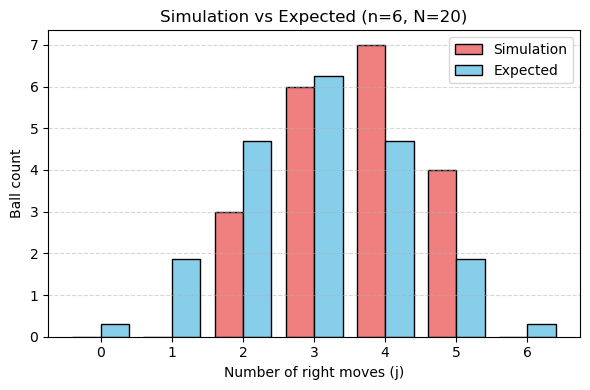

In [16]:
#Example2
import matplotlib.pyplot as plt
#Parameters
n = 6
N = 20

# 1. Simulation: how many balls ended up with j right moves
counts, right_moves = simulate_galton_board(n, N)
print("Simulation counts per position:", counts)

# 2. Binomial distribution: theoretical probabilities for each j
k, p_binom = binomial_distribution(n)
print("Binomial probabilities:", p_binom.round(3))

# 3. Expected value and standard deviation for each position
expected = expected_value(N, p_binom)
std_dev = standard_deviation(N, p_binom)
print("Expected counts:", expected.round(2))
print("Standard deviation:", std_dev.round(2))

# 4. Plot: simulation vs expected values
plt.figure(figsize=(6, 4))
plt.bar(k - 0.2, counts, width=0.4, label='Simulation', color='lightcoral', edgecolor='black')
plt.bar(k + 0.2, expected, width=0.4, label='Expected', color='skyblue', edgecolor='black')
plt.xlabel("Number of right moves (j)")
plt.ylabel("Ball count")
plt.title("Simulation vs Expected (n=6, N=20)")
plt.xticks(k)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




In [18]:
##Fourfth Step: Normal approximation
from scipy.stats import norm

def normal_approximation(n):
    k = np.arange(n+1)
    m = n / 2
    sigma = np.sqrt(n / 4)
    p_norm = norm.pdf(k, m, sigma)
    p_norm /= p_norm.sum()  # normalize to sum to 1
    return k, p_norm

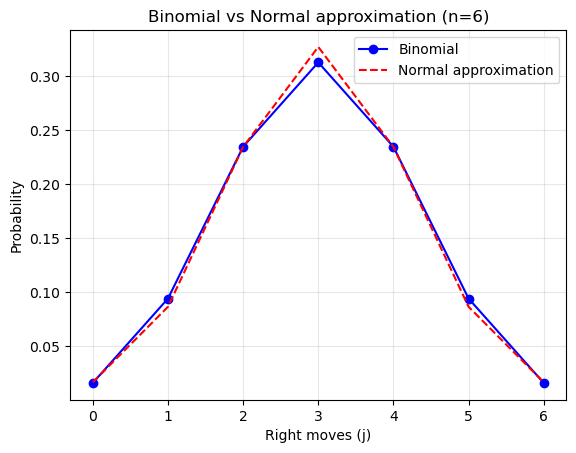

In [19]:
##Fifth Step : Plotting Binomial vs Normal
n = 6  # number of steps
k, p_binom = binomial_distribution(n)
_, p_norm = normal_approximation(n)

plt.plot(k, p_binom, 'bo-', label='Binomial')
plt.plot(k, p_norm, 'r--', label='Normal approximation')
plt.title(f'Binomial vs Normal approximation (n={n})')
plt.xlabel('Right moves (j)')
plt.ylabel('Probability')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [20]:
##Sixth Step: Error calculation 

def compute_mse(empirical_counts, theoretical_probs, N):
    empirical_probs = empirical_counts / N
    mse = np.mean((empirical_probs - theoretical_probs)**2)
    return mse


In [21]:
#Example3 : compute MSE

n=6
N=20
counts, _ = simulate_galton_board(n, N)
_, p_binom = binomial_distribution(n)

mse = compute_mse(counts, p_binom, N)
print("Mean Squared Error between simulation and binomial: ", mse)


Mean Squared Error between simulation and binomial:  0.0018694196428571432


In [27]:
##Seventh Step: Error between binomial and normal distribution 
def mse_binomial_vs_normal(n, p=0.5):
    _, p_binom = binomial_distribution(n)
    _, p_norm = normal_approximation(n)
    mse = np.mean((p_binom - p_norm) ** 2)
    return mse


In [30]:
# Example4: compute MSE for different n
for n in [6, 10, 20, 50, 100]:
    error = mse_binomial_vs_normal(n)
    print("n =", n, "MSE:", format(error, ".6f"))

n = 6 MSE: 0.000046
n = 10 MSE: 0.000008
n = 20 MSE: 0.000001
n = 50 MSE: 0.000000
n = 100 MSE: 0.000000
